In [3]:
import pandas as pd
house_price_data=pd.read_csv('house_price_data.csv') 
#house_price_data.columns#list of columns in the data frame
#house_price_data.shape#to get the number of rows and columns in the data frame
#house_price_data.describe()#summary statistics of every numeric feature
#house_price_data.dtypes
#house_price_data['MSSubClass'].dtype 
#num_cols= []
#for col in house_price_data.columns:
   # if house_price_data[col].dtype=='int64' or house_price_data[col].dtype=='float64':
           #num_cols.append(col)  
#for col in house_price_data.columns:
   # if house_price_data[col].dtype=='object': 
          # num_cols.append(col)            
#num_cols=[col for col in house_price_data if house_price_data[col].dtype=='int64' or house_price_data[col].dtype=='float64']
#num_cols=[col for col in house_price_data if house_price_data[col].dtype=='object'] 






house_price_data[house_price_data['MSZoning']=='RL']
#house_price_data.isnull().sum()



C:\Users\Bhavana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.hist(house_price_data['SalePrice'])
#sns.distplot(house_price_data['SalePrice'])
#house_price_data['SalePrice'].describe()
#sns.boxplot(house_price_data['SalePrice'],orient='v',color='red')
sns.scatterplot(house_price_data['LotArea'],house_price_data['SalePrice'])


C:\Users\Bhavana\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
missing_values_df=pd.DataFrame({'Columns Name':house_price_data.columns,
                                 'missing_values_count':house_price_data.isnull().sum(), 
                                 'Missing_values_percentage':house_price_data.isnull().sum()/house_price_data.shape[0]*100})
missing_values_df.sort_values(by='Missing_values_percentage',ascending=False)

,Columns Name,missing_values_count,Missing_values_percentage
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
FireplaceQu,FireplaceQu,690,47.260274
...,...,...,...
ExterQual,ExterQual,0,0.000000
Exterior2nd,Exterior2nd,0,0.000000
Exterior1st,Exterior1st,0,0.000000
RoofMatl,RoofMatl,0,0.000000


In [6]:
correlation_df=house_price_data.corr()#pearson corelation co-efficient
correlation_df['SalePrice']
import numpy as np
np.corrcoef(house_price_data['LotArea'],house_price_data['SalePrice'])
correlation_df=house_price_data.iloc[:,-1] 
correlation_df

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

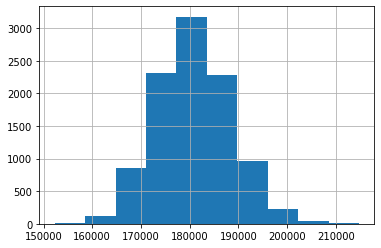

In [7]:
sampled_means=[]#Creating a list to store the sampled means
#for 10000 time
for i in range(0,10000):
    #take random sample of 100 rows from the population,take the mean of those rows,append to sampled_means
    sampled_means.append(house_price_data['SalePrice'].sample(n=100).mean())
#plot a histogram of sampled_means.
pd.Series(sampled_means).hist(bins=10)

In [1]:
import pandas as pd
house_price_data=pd.read_csv('house_price_data.csv') 
house_price_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
missing_value=pd.DataFrame({'Col_name':house_price_data.columns,
                           'Count':house_price_data.isnull().sum(),
                           'Percentage':house_price_data.isnull().sum()/house_price_data.shape[0]*100})
missing_value           

,Col_name,Count,Percentage
Id,Id,0,0.000000
MSSubClass,MSSubClass,0,0.000000
MSZoning,MSZoning,0,0.000000
LotFrontage,LotFrontage,259,17.739726
LotArea,LotArea,0,0.000000
...,...,...,...
MoSold,MoSold,0,0.000000
YrSold,YrSold,0,0.000000
SaleType,SaleType,0,0.000000
SaleCondition,SaleCondition,0,0.000000


In [10]:
col_to_drop=list(missing_value[missing_value['Percentage']>50]['Col_name'])
col_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
for col in house_price_data.columns:
    if house_price_data[col].nunique()== house_price_data.shape[0] or house_price_data[col].nunique()==1: 
        print(col)        
        col_to_drop.append(col)

Id


In [12]:
col_to_drop=list(set(col_to_drop))
col_to_drop
house_price_data.drop(columns=col_to_drop,inplace=True)

In [13]:
from datetime import datetime
datetime.now().year
house_price_data['Age']=datetime.now().year-house_price_data['YearBuilt']
house_price_data['Age']

0        17
1        44
2        19
3       105
4        20
       ... 
1455     21
1456     42
1457     79
1458     70
1459     55
Name: Age, Length: 1460, dtype: int64

In [14]:
for col in house_price_data.columns:
    if col!='YearBuilt':
        house_price_data[col]=house_price_data[col].astype(object)
house_price_data['YearBuilt'].dtype
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null object
LotArea          1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       145

In [23]:
house_price_data.shape
from sklearn.model_selection import train_test_split
y=house_price_data['SalePrice']
x_house_price_data,x_test,y_house_price_data,y_test=train_test_split(house_price_data,y,test_size=0.2,random_state=22)
x_house_price_data
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null object
LotArea          1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       145

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(house_price_data,y,test_size=0.2,random_state=22)
#filling missing values
for col in x_house_price_data.columns:
    if x_train[col].dtype=='object':
        x_train[col]=x_train[col].fillna(x_train[col].mode()[0]).astype(object)
        x_test[col]=x_test[col].fillna(x_train[col].mode()[0]).astype(object)
    else:
        x_train[col]=x_train[col].fillna(x_train[col].mean())
        x_test[col]=x_test[col].fillna(x_train[col].mean())  

import warnings
warnings.filterwarnings('ignore')
x_train

C:\Users\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Bhavana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
1070,20,RL,72,10152,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,192,0,0,6,2007,WD,Normal,135000,64
1379,80,RL,73,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2008,WD,Normal,167500,14
138,60,RL,73,9066,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,12,2008,WD,Normal,230000,21
667,20,RL,65,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,10,2008,WD,Normal,193500,26
1215,20,RL,99,7094,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2007,WD,Normal,125000,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,20,RL,60,9248,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2009,WD,Normal,173000,28
960,20,RL,50,7207,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,116500,62
812,20,C (all),66,8712,Grvl,Reg,Bnk,AllPub,Inside,Mod,...,0,0,0,54,6,2010,WD,Alloca,55993,68
132,20,RL,75,7388,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,7,2007,WD,Normal,150750,61


In [40]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

le=LabelEncoderExt()
scaler=MinMaxScaler()

for col in x_train.columns:
    if x_train[col].dtype=='object':
        le.fit(x_train[col])
        x_train[col]=le.transform(x_train[col])
        x_test[col]=le.transform(x_test[col])
    elif x_train[col].dtype=='int64' or 'float64':
        x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
        x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))
x_train
        

ValueError: could not convert string to float: 'RL'

In [35]:
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
1159,60,RL,76,9120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2008,WD,Normal,185000,46
866,20,RL,67,10656,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,0,0,11,2007,New,Partial,248900,14
432,160,RM,24,1920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,122500,49
798,60,RL,104,13518,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2009,New,Partial,485000,12
1287,20,RL,NaN,36500,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,6,2006,WD,Normal,190000,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,20,RL,NaN,21000,Pave,Reg,Bnk,AllPub,Corner,Gtl,...,0,0,0,0,10,2007,COD,Abnorml,217000,67
180,160,FV,NaN,2117,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2007,WD,Normal,177000,20
1449,180,RM,21,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2006,WD,Abnorml,92000,50
876,20,RL,94,25286,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,0,0,0,1,2007,WD,Normal,132250,57


In [36]:
x_train['YearBuilt']

1070    0.608696
1379    0.971014
138     0.920290
667     0.884058
1215    0.681159
          ...   
356     0.869565
960     0.623188
812     0.579710
132     0.630435
885     0.920290
Name: YearBuilt, Length: 1168, dtype: float64

In [38]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)
y_log_pred=dec_tree.predict(x_test)
y_log_pred

ValueError: could not convert string to float: 'RL'

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test,y_dtree_pred)

0.3930885855178262

In [26]:
from sklearn.ensemble import AdaBoostRegressor
rf= AdaBoostRegressor()
rf.fit(x_train,y_train)
y_rf_pred=rf.predict(x_test)


ValueError: Input contains NaN